In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df['Gender'] = le.fit_transform(df['Gender'])

In [6]:
def min_max_scaling(feature):
    df[feature] = ((df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min()))

min_max_scaling('EstimatedSalary')
min_max_scaling('Age')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,0.023810,0.029630,0
1,15810944,1,0.404762,0.037037,0
2,15668575,0,0.190476,0.207407,0
3,15603246,0,0.214286,0.311111,0
4,15804002,1,0.023810,0.451852,0
...,...,...,...,...,...
395,15691863,0,0.666667,0.192593,1
396,15706071,1,0.785714,0.059259,1
397,15654296,0,0.761905,0.037037,1
398,15755018,1,0.428571,0.133333,0


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['User ID', 'Purchased'], axis=1)
Y = df['Purchased']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [9]:
Y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred)
cm

array([[65,  1],
       [14, 20]], dtype=int64)

In [11]:
TP = cm[0][0] 
TN = cm[1][1] 
FP = cm[1][0] 
FN = cm[0][1] 

print(f'TN: {TN}')
print(f'TP: {TP}')
print(f'FN: {FN}')
print(f'FP: {FP}')

TN: 20
TP: 65
FN: 1
FP: 14


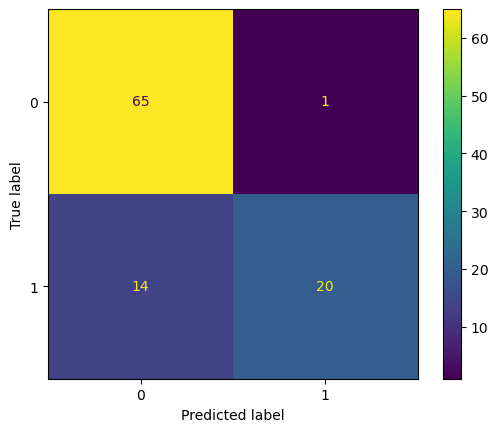

In [12]:
cmDisplay = ConfusionMatrixDisplay(cm)
cmDisplay.plot()

In [13]:
accuracy = ((TP + TN) / (TP + TN + FP + FN))
error = 1 - accuracy
precision = ((TP) / (TP + FP))
recall = ((TP) / (TP + FN))

In [14]:
print(f'accuracy: {accuracy}')
print(f'error: {error}')
print(f'precision: {precision}')
print(f'recall: {recall}')

accuracy: 0.85
error: 0.15000000000000002
precision: 0.8227848101265823
recall: 0.9848484848484849


In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

0.85
